In [ ]:
#Mount our google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google_drive_downloader import GoogleDriveDownloader as gdd
url = '1hiayuEMSil4WUD8Z43dNP_O_ZrlsO3Dg'
gdd.download_file_from_google_drive(file_id = url,dest_path='./merged_dataset.csv',unzip=True)

Unzipping...

/usr/local/lib/python3.7/dist-packages/google_drive_downloader/google_drive_downloader.py:78: UserWarning: Ignoring `unzip` since "1hiayuEMSil4WUD8Z43dNP_O_ZrlsO3Dg" does not look like a valid zip file
  warnings.warn('Ignoring `unzip` since "{}" does not look like a valid zip file'.format(file_id))


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, make_scorer

In [ ]:
df = pd.read_csv('/content/merged_dataset.csv')
df.head(5)

,Unnamed: 0,label,full_text
0,0,0,!!! rt @mayasolovely: woman complain clean hou...
1,1,1,!!!!! rt @mleew17: boy dat cold...tyga dwn bad...
2,2,1,!!!!!!! rt @urkindofbrand dawg!!!! rt @80sbaby...
3,3,1,!!!!!!!!! rt @c_g_anderson: @viva_bas look lik...
4,4,1,!!!!!!!!!!!!! rt @shenikaroberts: shit hear mi...


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['full_text'],  df['label'],
                                                    random_state=42)

print('Number of rows in the total set: {}'.format(df.shape[0]))
print('Number of rows in the training set: {}'.format(X_train.shape[0]))
print('Number of rows in the test set: {}'.format(X_test.shape[0]))

Number of rows in the total set: 27030
Number of rows in the training set: 20272
Number of rows in the test set: 6758


In [ ]:
# Instantiate the CountVectorizer method
count_vector = CountVectorizer(stop_words = 'english', lowercase = True)

# Fit the training data and then return the matrix
training_data = count_vector.fit_transform(X_train)

# Transform testing data and return the matrix. Note we are not fitting the testing data into the CountVectorizer()
testing_data = count_vector.transform(X_test)


In [ ]:
print('training_data: ',training_data.toarray())
print('testing_data: ',testing_data.toarray())

training_data:  [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
testing_data:  [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
import time
X_train = training_data
X_test = testing_data
learner = LogisticRegression()
results = {}
results['Algorithm']='Logistic Regression'
# Fit the learner:
start = time.time() # Get start time
print("Training start")
learner = learner.fit(X_train, y_train)
end = time.time() # Get end time
print("Training end")

# Store the training time
results['Training Time'] = end - start

print("Prediction start")
start = time.time() # Get start time
predictions_test = learner.predict(X_test)
predictions_train = learner.predict(X_train)
end = time.time() # Get end time
print("Prediction end")

# Store the prediction time
results['Prediction Time'] = end - start

# Compute the Accuracy on Test Set
results['Accuracy: Test'] = accuracy_score(y_test, predictions_test)

# Compute the Accuracy on Training Set
results['Accuracy: Train'] = accuracy_score(y_train, predictions_train)

# Compute the F1 Score on Test Set
results['F1 Score: Test'] = f1_score(y_test, predictions_test)

# Compute the F1 Score on Training Set
results['F1 Score: Train'] = f1_score(y_train, predictions_train)

# Compute the Precision on Test Set
results['Precision: Test'] = precision_score(y_test, predictions_test)

# Compute the Precision on Training Set
results['Precision: Train'] = precision_score(y_train, predictions_train)

# Compute the Recall on Test Set
results['Recall: Test'] = recall_score(y_test, predictions_test)

# Compute the Recall on Training Set
results['Recall: Train'] = recall_score(y_train, predictions_train)

# Success
print("Training {} finished in {:.2f} sec".format(learner.__class__.__name__, results['Training Time']))
print('----------------------------------------------------')
results = pd.DataFrame([results])
results = results.reindex(columns = ['Algorithm', 'Accuracy: Test', 'Precision: Test', 'Recall: Test', 'F1 Score: Test', 'Prediction Time',
                          'Accuracy: Train', 'Precision: Train', 'Recall: Train', 'F1 Score: Train', 'Training Time'])

Training start
Training end
Prediction start
Prediction end
Training LogisticRegression finished in 1.49 sec
----------------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
results

,Algorithm,Accuracy: Test,Precision: Test,Recall: Test,F1 Score: Test,Prediction Time,Accuracy: Train,Precision: Train,Recall: Train,F1 Score: Train,Training Time
0,Logistic Regression,0.918319,0.955077,0.941571,0.948276,0.002655,0.979923,0.986478,0.98837,0.987423,1.491836


[1 0 0 ... 1 1 1]


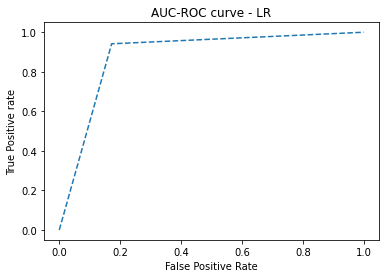

In [ ]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from tensorflow import keras

model = learner
y_pred = model.predict(X_test)
# print(y_pred)
print(np.array(y_test))
nn_fpr_keras, nn_tpr_keras, nn_thresholds_keras = roc_curve(np.array(y_test), y_pred)
auc_keras = auc(nn_fpr_keras, nn_tpr_keras)
plt.plot(nn_fpr_keras, nn_tpr_keras, linestyle='--', label='LR (auc = %0.3f)' % auc_keras)
plt.title('AUC-ROC curve - LR')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
auc_score = roc_auc_score(np.array(y_test), y_pred)